In [1]:
import pandas as pd
import numpy as np
from utils.utilities import *
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from tqdm import tqdm

#### 3-input AND gates

#### Optimized induction

In [2]:
folder = '074-075-038-020-3i-induction'
inducers = {
    'ara': [0, 0.081, 0.32, 13],
    'ohc14': [0, 0.609, 2.065, 10],
    'sal': [0, 9.618, 19.02, 36.135, 100]
}

In [3]:
raw_data = generate_raw(folder, filename='raw-1')

A ['Sample', 'Blank', 'Negative']
B ['Positive', 'Blank', 'Negative']


In [4]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_1 = get_data_at(pos_corrected, h=8)

In [5]:
raw_data = generate_raw(folder, filename='raw-2')

A ['Sample', 'Blank', 'Negative']
B ['Positive', 'Blank', 'Negative']


In [6]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_2 = get_data_at(pos_corrected, h=8)

In [7]:
df = pd.concat([final_data_1, final_data_2], axis=1).reset_index()
df.columns = ['name', 'E38-E20_074', 'E38-E20_075']
df['ara'] = df['name'].str[-3]
df['ohc14'] = df['name'].str[-2]
df['sal'] = df['name'].str[-1]
df = df.sort_values(['ara', 'ohc14', 'sal']).reset_index(drop=True)

final_data = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
                                     columns=['ara', 'ohc14', 'sal']),
                        df[['E38-E20_074', 'E38-E20_075']]], axis=1)
final_data

,ara,ohc14,sal,E38-E20_074,E38-E20_075
0,0.0,0.0,0.000,0.013170,0.014822
1,0.0,0.0,9.618,0.017319,0.019478
2,0.0,0.0,19.020,0.037979,0.019165
3,0.0,0.0,36.135,0.047192,0.064697
4,0.0,0.0,100.000,0.035882,0.052959
...,...,...,...,...,...
75,13.0,10.0,0.000,0.179861,0.180209
76,13.0,10.0,9.618,0.399139,0.438759
77,13.0,10.0,19.020,0.695925,0.881812
78,13.0,10.0,36.135,1.579796,1.513640


In [8]:
df = pd.concat([final_data_1, final_data_2], axis=1).median(axis=1).reset_index()
df.columns = ['name', 'fluo']
df['ara'] = df['name'].str[-3]
df['ohc14'] = df['name'].str[-2]
df['sal'] = df['name'].str[-1]
df = df.sort_values(['ara', 'ohc14', 'sal']).reset_index(drop=True)

final_data = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
                                     columns=['ara', 'ohc14', 'sal']),
                        df['fluo']], axis=1)
final_data

,ara,ohc14,sal,fluo
0,0.0,0.0,0.000,0.013996
1,0.0,0.0,9.618,0.018399
2,0.0,0.0,19.020,0.028572
3,0.0,0.0,36.135,0.055945
4,0.0,0.0,100.000,0.044421
...,...,...,...,...
75,13.0,10.0,0.000,0.180035
76,13.0,10.0,9.618,0.418949
77,13.0,10.0,19.020,0.788869
78,13.0,10.0,36.135,1.546718


In [9]:
final_data.to_csv('datasets/cleansed/074-075-3i-AND-gates-induction-matrix-optimized-dilution.csv', index=False)

#### Fold dilution

In [10]:
folder = '048-3i-AND-gates-induction-matrix-circuit-4'
inducers = {
    'ara': [0, 0.8125, 3.25, 13],
    'ohc14': [0, 2.5, 5, 10],
    'sal': [0, 25, 50, 100]
}

In [11]:
raw_data = generate_raw(folder)

A ['Sample', 'Blank', 'Negative']
B ['Positive', 'Blank', 'Negative']


In [12]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_1 = get_data_at(pos_corrected, h=8)

In [13]:
df = final_data_1.reset_index()
df.columns = ['name', 'E38-E20']
df['ara'] = df['name'].str[-3]
df['ohc14'] = df['name'].str[-2]
df['sal'] = df['name'].str[-1]
df = df.sort_values(['ara', 'ohc14', 'sal']).reset_index(drop=True)

data_1 = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
                                     columns=['ara', 'ohc14', 'sal']),
                        df['E38-E20']], axis=1)

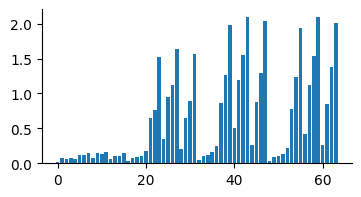

In [14]:
plt.figure(figsize=[4, 2])
plt.bar(data_1.index, data_1['E38-E20'])
sns.despine()

In [15]:
folder = '047-3i-AND-gates-induction-matrix-circuit-5'
raw_data = generate_raw(folder)

A ['Sample', 'Blank', 'Negative']
B ['Positive', 'Blank', 'Negative']


In [16]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_2 = get_data_at(pos_corrected, h=8)

In [17]:
df = final_data_2.reset_index()
df.columns = ['name', 'E11-E38']
df['ara'] = df['name'].str[-3]
df['ohc14'] = df['name'].str[-2]
df['sal'] = df['name'].str[-1]
df = df.sort_values(['ara', 'ohc14', 'sal']).reset_index(drop=True)

data_2 = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
                                     columns=['ara', 'ohc14', 'sal']),
                        df['E11-E38']], axis=1)

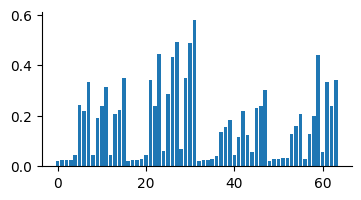

In [18]:
plt.figure(figsize=[4, 2])
plt.bar(data_2.index, data_2['E11-E38'])
sns.despine()

In [19]:
plt.figure(figsize=[4, 2])
plt.bar(data_5.index, data_5['E11-E38'])
sns.despine()

NameError: name 'data_5' is not defined

<Figure size 400x200 with 0 Axes>

In [20]:
folder = '046-3i-AND-gates-induction-matrix-fixed-2'
raw_data = generate_raw(folder)

A ['Sample', 'Blank', 'Negative']
B ['Positive', 'Blank', 'Negative']


In [21]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_3 = np.abs(pos_corrected.median())

In [22]:
e38e11_3 = final_data_3[final_data_3.index.str.startswith('E38-E11_')]
e38e20_3 = final_data_3[final_data_3.index.str.startswith('E38-E20.1_')]
e11e38_3 = final_data_3[final_data_3.index.str.startswith('E11-E38_')]
len(e38e11_3), len(e38e20_3), len(e11e38_3)

(8, 8, 8)

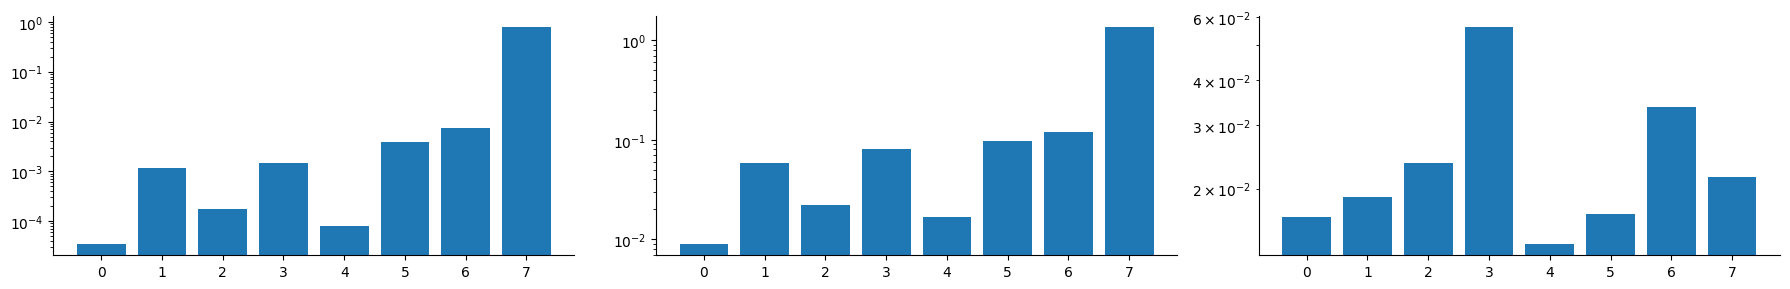

In [25]:
#e11e38_3 weird
row, col = 1, 3
max_ind_gate = [e38e11_3, e38e20_3, e11e38_3]
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    ax.bar(np.arange(8), max_ind_gate[i])
    sns.despine()
    ax.set_yscale('log')
plt.tight_layout()

In [26]:
df = final_data_3[final_data_3.index.str.startswith('E38-E20_')].reset_index()
df.columns = ['name', 'E38-E20']
df['ara'] = df['name'].str[-3]
df['ohc14'] = df['name'].str[-2]
df['sal'] = df['name'].str[-1]
df = df.sort_values(['ara', 'ohc14', 'sal']).reset_index(drop=True)

#weird
data_3 = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
                                     columns=['ara', 'ohc14', 'sal']),
                        df['E38-E20']], axis=1)

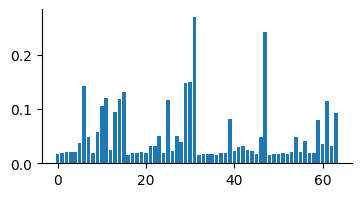

In [27]:
plt.figure(figsize=[4, 2])
plt.bar(data_3.index, data_3['E38-E20'])
sns.despine()

In [28]:
folder = '045-3i-AND-gates-induction-matrix-fixed-1'
raw_data = generate_raw(folder)

A ['Sample', 'Blank', 'Negative']
B ['Positive', 'Blank', 'Negative']


In [29]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_4 = np.abs(pos_corrected.median())

In [30]:
e38e11_4 = final_data_4[final_data_4.index.str.startswith('E38-E11.1_')]
e38e20_4 = final_data_4[final_data_4.index.str.startswith('E38-E20_')]
e11e38_4 = final_data_4[final_data_4.index.str.startswith('E11-E38_')]
len(e38e11_4), len(e38e20_4), len(e11e38_4)

(8, 8, 8)

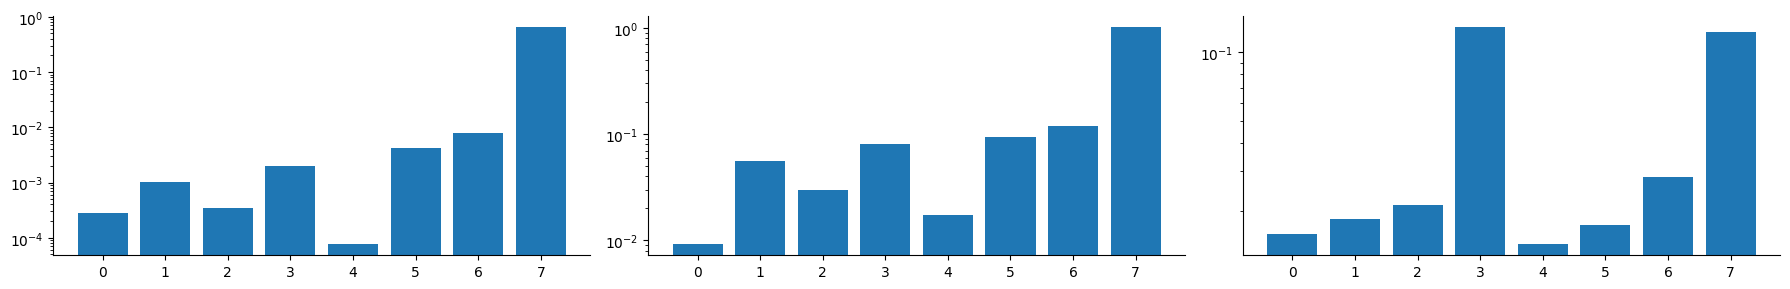

In [32]:
row, col = 1, 3
max_ind_gate = [e38e11_4, e38e20_4, e11e38_4]
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    ax.bar(np.arange(8), max_ind_gate[i])
    ax.set_yscale('log')
    sns.despine()
plt.tight_layout()

In [46]:
df = final_data_4[final_data_4.index.str.startswith('E38-E11_')].reset_index()
df.columns = ['name', 'E38-E11']
df['ara'] = df['name'].str[-3]
df['ohc14'] = df['name'].str[-2]
df['sal'] = df['name'].str[-1]
df = df.sort_values(['ara', 'ohc14', 'sal']).reset_index(drop=True)

data_4 = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
                                     columns=['ara', 'ohc14', 'sal']),
                        df['E38-E11']], axis=1)

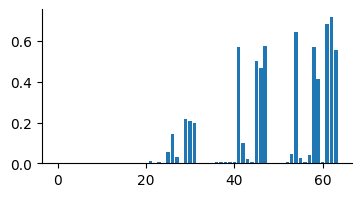

In [47]:
plt.figure(figsize=[4, 2])
plt.bar(data_4.index, data_4['E38-E11'])
sns.despine()

In [48]:
folder = '041-3i-AND-gates-induction-matrix-rep2'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Positive', 'Negative', 'Blank']


In [49]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_5 = get_data_at(pos_corrected, h=8)

In [50]:
e38e11_5 = final_data_5[final_data_5.index.str.startswith('E38-E11_')]
e38e20_5 = final_data_5[final_data_5.index.str.startswith('E38-E20_')]
e11e38_5 = final_data_5[final_data_5.index.str.startswith('E11-E38.1_')]
len(e38e11_5), len(e38e20_5), len(e11e38_5)

(8, 8, 8)

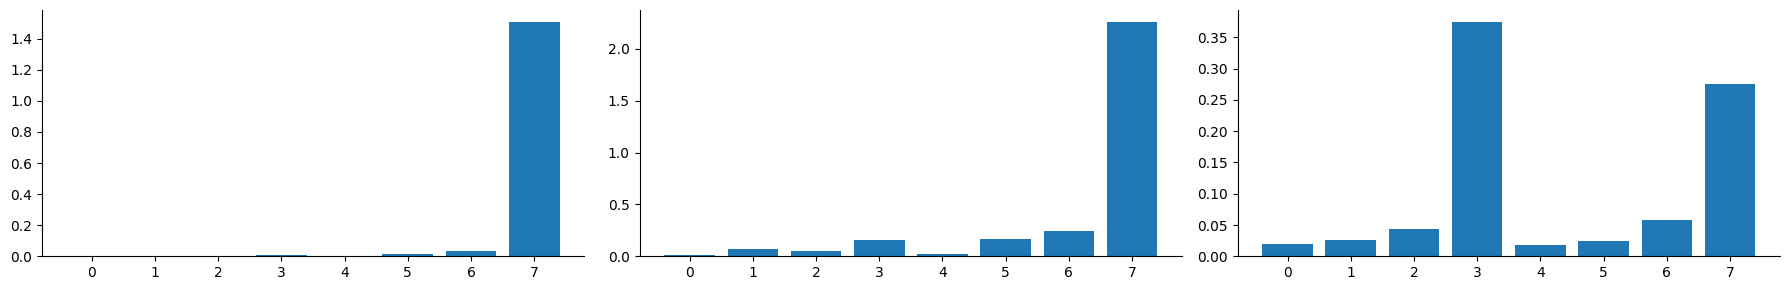

In [51]:
row, col = 1, 3
max_ind_gate = [e38e11_5, e38e20_5, e11e38_5]
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    ax.bar(np.arange(8), max_ind_gate[i])
    sns.despine()
plt.tight_layout()

In [53]:
df = final_data_5[final_data_5.index.str.startswith('E11-E38_')].reset_index()
df.columns = ['name', 'E11-E38']
df['ara'] = df['name'].str[-3]
df['ohc14'] = df['name'].str[-2]
df['sal'] = df['name'].str[-1]
df = df.sort_values(['ara', 'ohc14', 'sal']).reset_index(drop=True)

data_5 = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
                                     columns=['ara', 'ohc14', 'sal']),
                        df['E11-E38']], axis=1)

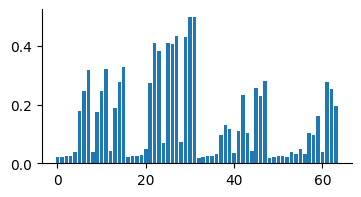

In [55]:
plt.figure(figsize=[4, 2])
plt.bar(data_5.index, data_5['E11-E38'])
sns.despine()

In [75]:
folder = '040-3i-AND-gates-induction-matrix-rep1'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Positive', 'Negative', 'Blank']


In [76]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_6 = get_data_at(pos_corrected, h=8)

In [77]:
e38e11_6_0 = final_data_6[final_data_6.index.str.startswith('E38-E11.0_')]
e38e11_6_1 = final_data_6[final_data_6.index.str.startswith('E38-E11.1_')]
e38e20_6 = final_data_6[final_data_6.index.str.startswith('E38-E20_')]
len(e38e11_6_0), len(e38e11_6_1), len(e38e20_6)

(8, 8, 8)

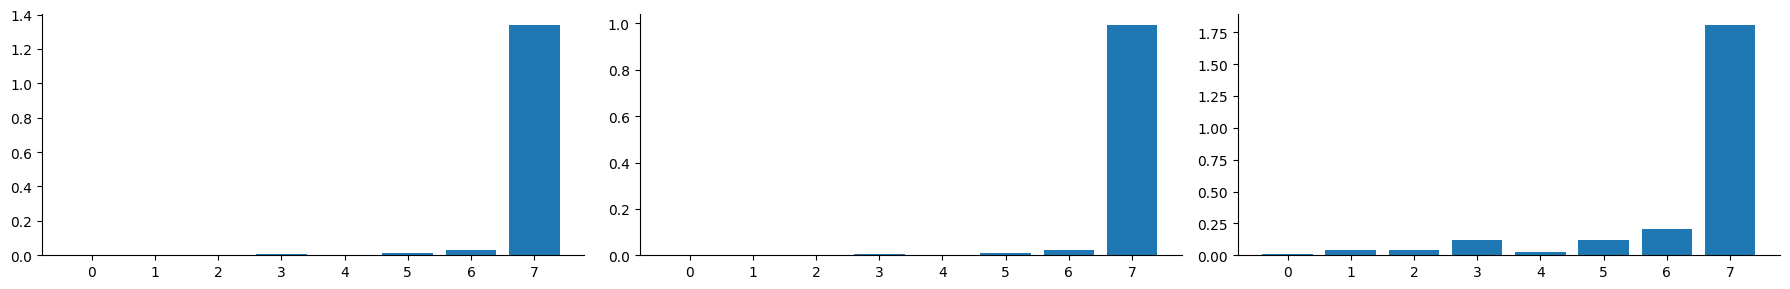

In [78]:
row, col = 1, 3
max_ind_gate = [e38e11_6_0, e38e11_6_1, e38e20_6]
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    ax.bar(np.arange(8), max_ind_gate[i])
    sns.despine()
plt.tight_layout()

In [79]:
folder = '039-3i-AND-gates'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Positive', 'Negative', 'Blank']


In [80]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_7 = get_data_at(pos_corrected, h=8)

In [81]:
e20e11_7 = final_data_7[final_data_7.index.str.startswith('E20-E11_')]
e38e11_7 = final_data_7[final_data_7.index.str.startswith('E38-E11_')]
e38e20_7 = final_data_7[final_data_7.index.str.startswith('E38-E20_')]
e11e38_7 = final_data_7[final_data_7.index.str.startswith('E11-E38_')]
e20e38_7 = final_data_7[final_data_7.index.str.startswith('E20-E38_')]
len(e20e11_7), len(e38e11_7), len(e38e20_7), len(e11e38_7), len(e20e38_7)

(8, 8, 8, 8, 8)

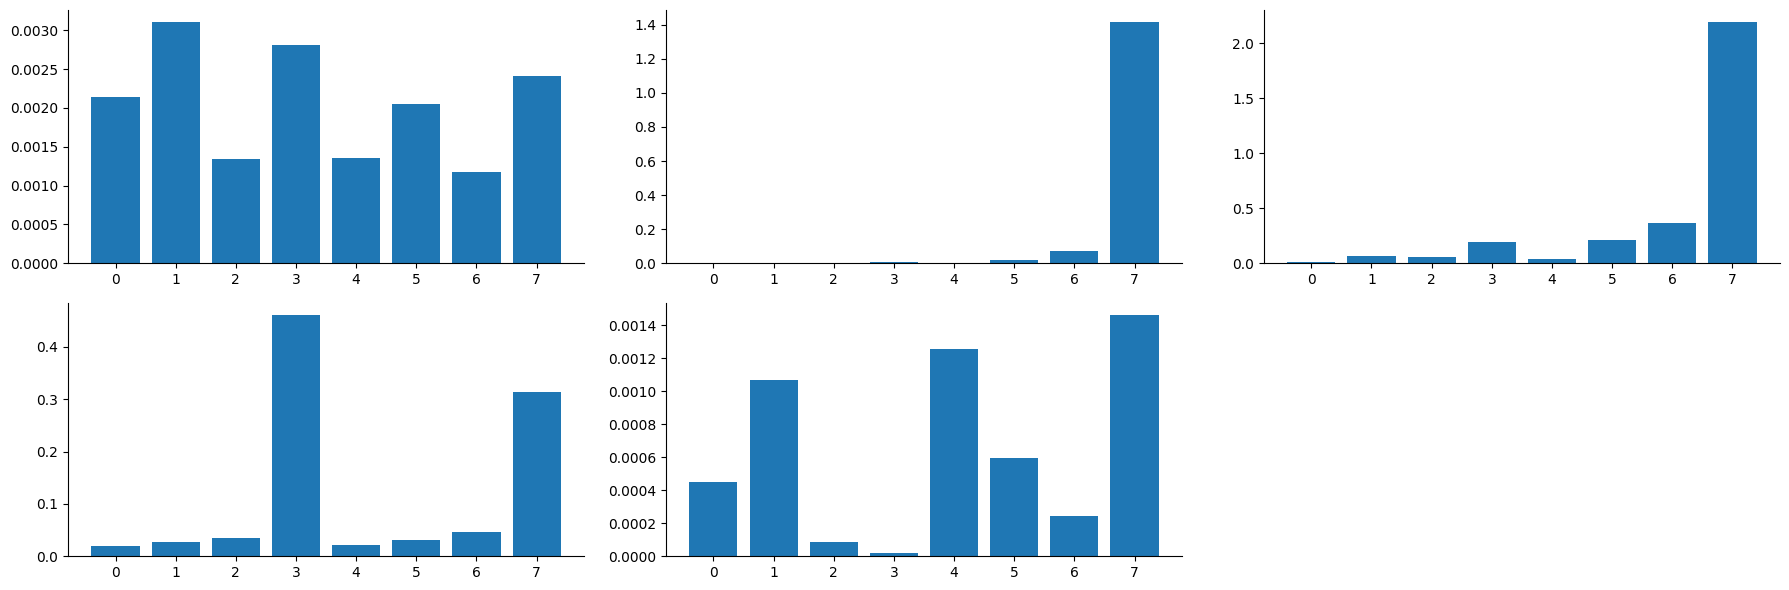

In [83]:
row, col = 2, 3
max_ind_gate = [e20e11_7, e38e11_7, e38e20_7, e11e38_7, e20e38_7]
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i<len(max_ind_gate):
        ax.bar(np.arange(8), max_ind_gate[i])
        sns.despine()
    else:
        ax.set_visible(False)
plt.tight_layout()

In [84]:
folder = '037-E38-E11'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Positive', 'Negative', 'Blank']


In [85]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data_8 = get_data_at(pos_corrected, h=8)

In [86]:
e20e11_8 = final_data_8[final_data_8.index.str.startswith('E20-E11_')]
e38e11_8 = final_data_8[final_data_8.index.str.startswith('E38-E11.1_')]
len(e20e11_8), len(e38e11_8)

(8, 8)

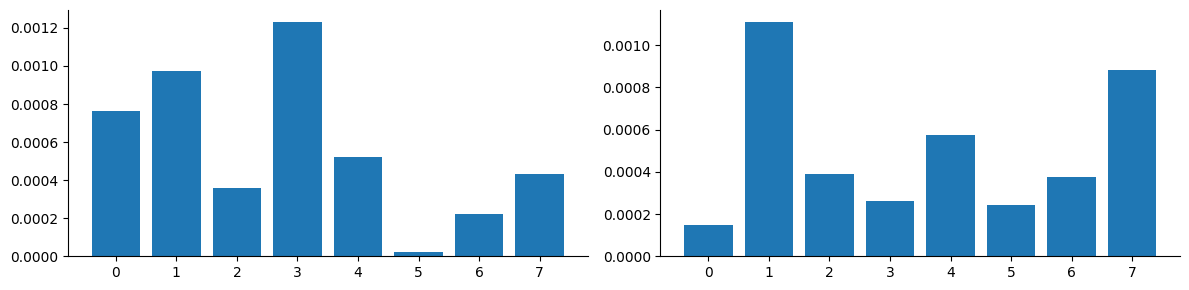

In [87]:
#did not work at all
row, col = 1, 2
max_ind_gate = [e20e11_8, e38e11_8]
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    ax.bar(np.arange(8), max_ind_gate[i])
    sns.despine()
plt.tight_layout()

In [127]:
df = final_data_8[final_data_8.index.str.startswith('E38-E11_')].reset_index()
df.columns = ['name', 'E38-E11']
df['ara'] = df['name'].str[-3]
df['ohc14'] = df['name'].str[-2]
df['sal'] = df['name'].str[-1]
df = df.sort_values(['ara', 'ohc14', 'sal']).reset_index(drop=True)

data_8 = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
                                     columns=['ara', 'ohc14', 'sal']),
                        df['E38-E11']], axis=1)

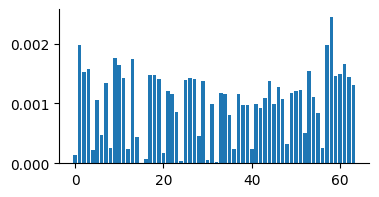

In [128]:
plt.figure(figsize=[4, 2])
plt.bar(data_8.index, data_8['E38-E11'])
sns.despine()

Maximum induction aggregated.

In [108]:
e38e11_agg = [e38e11_3, e38e11_4, e38e11_5, e38e11_6_0, e38e11_6_1, e38e11_7]
e38e20_agg = [e38e20_3, e38e20_4, e38e20_5, e38e20_6, e38e20_7]
e11e38_agg = [e11e38_3, e11e38_4, e11e38_5, e11e38_7]
e20e11_agg = [e20e11_7]
e20e38_agg = [e20e38_7]

In [124]:
max_ind_gate_df = pd.DataFrame(itertools.product([np.min(inducers['ara']), np.max(inducers['ara'])],
                               [np.min(inducers['ohc14']), np.max(inducers['ohc14'])],
                               [np.min(inducers['sal']), np.max(inducers['sal'])]),
             columns=['ara', 'ohc14', 'sal'])
e38e11_df = pd.concat([i.reset_index(drop=True) for i in e38e11_agg], axis=1)
e38e11_df.columns = ['E38-E11_046', 'E38-E11_045', 'E38-E11_041', 'E38-E11_040.0', 'E38-E11_040.1', 'E38-E11_039']
max_ind_gate_df = pd.concat([max_ind_gate_df, e38e11_df], axis=1)

e38e20_df = pd.concat([i.reset_index(drop=True) for i in e38e20_agg], axis=1)
e38e20_df.columns = ['E38-E20_046', 'E38-E20_045', 'E38-E20_041', 'E38-E11_040', 'E38-E11_039']
max_ind_gate_df = pd.concat([max_ind_gate_df, e38e20_df], axis=1)

e11e38_df = pd.concat([i.reset_index(drop=True) for i in e11e38_agg], axis=1)
e11e38_df.columns = ['E11-E38_046', 'E11-E38_045', 'E11-E38_041', 'E11-E38_039']
max_ind_gate_df = pd.concat([max_ind_gate_df, e11e38_df], axis=1)

max_ind_gate_df

,ara,ohc14,sal,E38-E11_046,E38-E11_045,E38-E11_041,E38-E11_040.0,E38-E11_040.1,E38-E11_039,E38-E20_046,E38-E20_045,E38-E20_041,E38-E11_040,E38-E11_039,E11-E38_046,E11-E38_045,E11-E38_041,E11-E38_039
0,0.0,0.0,0,0.000034,0.000280,0.000469,0.000610,0.000107,0.001388,0.008876,0.009131,0.009839,0.009892,0.012000,0.016670,0.015770,0.020297,0.019569
1,0.0,0.0,100,0.001151,0.001010,0.002762,0.002132,0.002527,0.003766,0.057811,0.055804,0.073536,0.044603,0.067588,0.018995,0.018431,0.026398,0.027457
2,0.0,10.0,0,0.000178,0.000346,0.002039,0.002041,0.001646,0.002758,0.022012,0.029889,0.050810,0.043196,0.058736,0.023626,0.021268,0.043878,0.035362
3,0.0,10.0,100,0.001454,0.002024,0.007109,0.006628,0.006456,0.009338,0.081339,0.080517,0.153101,0.118292,0.194044,0.056219,0.129285,0.375121,0.460860
4,13.0,0.0,0,0.000080,0.000076,0.000965,0.001074,0.000821,0.002498,0.016647,0.017135,0.026474,0.026622,0.038048,0.013998,0.014253,0.017871,0.021156
5,13.0,0.0,100,0.003862,0.004228,0.011722,0.011478,0.010409,0.016964,0.097281,0.094297,0.165202,0.121507,0.209421,0.017024,0.017303,0.023708,0.031629
6,13.0,10.0,0,0.007340,0.007733,0.030880,0.030322,0.024456,0.069715,0.119545,0.118303,0.239797,0.203479,0.362820,0.033646,0.028357,0.058730,0.046268
7,13.0,10.0,100,0.788990,0.650912,1.509172,1.337554,0.992128,1.415737,1.362325,1.019220,2.262450,1.804808,2.194233,0.021538,0.123488,0.275177,0.314018


In [125]:
max_ind_gate_df.to_csv('datasets/cleansed/2i-input-and-gates-max-induction.csv', index=False)

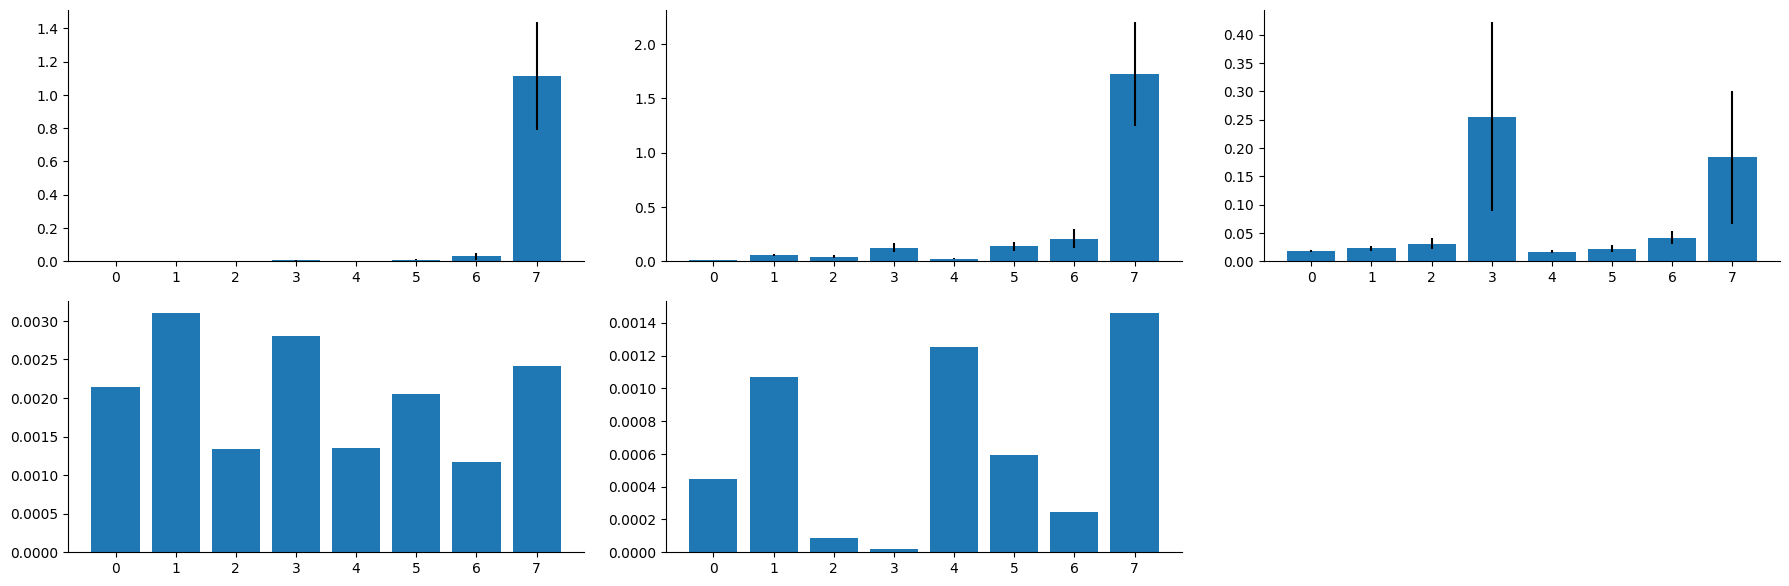

In [111]:
row, col = 2, 3
max_ind_gate = [pd.concat([i.reset_index(drop=True) for i in e38e11_agg], axis=1),
                pd.concat([i.reset_index(drop=True) for i in e38e20_agg], axis=1),
                pd.concat([i.reset_index(drop=True) for i in e11e38_agg], axis=1),
                pd.concat([i.reset_index(drop=True) for i in e20e11_agg], axis=1),
                pd.concat([i.reset_index(drop=True) for i in e20e38_agg], axis=1)]
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i<len(max_ind_gate):
        ax.bar(np.arange(8), np.mean(max_ind_gate[i], axis=1), yerr=np.std(max_ind_gate[i], axis=1))
        sns.despine()
    else:
        ax.set_visible(False)
plt.tight_layout()

In [133]:
induction_matrix = pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14'], inducers['sal']),
             columns=['ara', 'ohc14', 'sal'])
induction_matrix = pd.merge(induction_matrix, data_1, on=['ara', 'ohc14', 'sal'], how='inner')
induction_matrix = pd.merge(induction_matrix, data_2, on=['ara', 'ohc14', 'sal'], how='inner')
induction_matrix = pd.merge(induction_matrix, data_4, on=['ara', 'ohc14', 'sal'], how='inner')
induction_matrix = pd.merge(induction_matrix, data_5, on=['ara', 'ohc14', 'sal'], how='inner')
induction_matrix.to_csv('datasets/cleansed/3i-and-gates-induction-matrix.csv', index=False)

#### 2-input AND gates

In [3]:
folder = '079-E38-Amp-9-induction'
inducers = {
    'ara': np.array([0, 0.026, 0.195, 13, 15.86, 21.06, 33.8, 208]),
    'ohc14': np.array([0, 0.04, 0.06, 0.07, 0.09, 0.1, 1.2, 10])
}
raw_data = generate_raw(folder)

A ['Negative', 'Sample', 'Blank']
C ['Sample']
D ['Sample']
E ['Sample']
F ['Sample']
B ['Positive', 'Negative', 'Blank']
G ['Sample']
H ['Sample']


In [5]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data = get_data_at(pos_corrected, h=8)

In [7]:
final_data_ = final_data[final_data.index.str.startswith('E38_')].reset_index()
final_data_.columns = ['name', 'fluo']
final_data_['ara'] = final_data_['name'].str[-2]
final_data_['ohc14'] = final_data_['name'].str[-1]
final_data_ = final_data_.sort_values(['ara', 'ohc14']).reset_index(drop=True)

final_data_ = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']),
                        final_data_['fluo']], axis=1)
final_data_.to_csv('datasets/cleansed/079-E38-9-inductions.csv', index=False)

In [64]:
folder = '078-E20-Amp-9-induction'
inducers = {
    'ara': np.array([0, 0.026, 0.055, 0.097, 0.161, 0.268, 0.469, 0.971]),
    'ohc14': np.array([0, 0.236, 0.436, 0.713, 1.128, 1.772, 2.827, 4.763])
}
raw_data = generate_raw(folder)

A ['Sample', 'Blank', 'Negative']
B ['Positive', 'Blank', 'Negative']


In [65]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)[0]
final_data = get_data_at(pos_corrected, h=8)

In [67]:
final_data_ = final_data[final_data.index.str.startswith('E20_')].reset_index()
final_data_.columns = ['name', 'fluo']
final_data_['ara'] = final_data_['name'].str[-2]
final_data_['ohc14'] = final_data_['name'].str[-1]
final_data_ = final_data_.sort_values(['ara', 'ohc14']).reset_index(drop=True)

final_data_ = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']),
                        final_data_['fluo']], axis=1)
final_data_.to_csv('datasets/cleansed/078-E20-9-inductions.csv', index=False)

In [150]:
folder = '053-E20-E38-induction-matrix'
inducers = {
    'ara': np.array([0, 0.051, 0.203, 0.8125, 3.25, 13]),
    'ohc14': np.array([0, 0.078, 0.313, 1.25, 5, 20])
}
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Sample', 'Negative', 'Blank']
C ['Positive', 'Negative', 'Blank']


In [151]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A', 'B'], 'C') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_1 = get_data_at(pos_corrected[0], h=8)
final_data_2 = get_data_at(pos_corrected[1], h=8)

In [152]:
final_data_1 = final_data_1.reset_index()
final_data_1['ara'] = final_data_1['name'].str[-2]
final_data_1['ohc14'] = final_data_1['name'].str[-1]
final_data_1.columns = ['name', 'E20', 'ara', 'ohc14']
final_data_1 = final_data_1.sort_values(['ara', 'ohc14'])

final_data_2 = final_data_2.reset_index()
final_data_2['ara'] = final_data_2['name'].str[-2]
final_data_2['ohc14'] = final_data_2['name'].str[-1]
final_data_2.columns = ['name', 'E38', 'ara', 'ohc14']
final_data_2 = final_data_2.sort_values(['ara', 'ohc14'])

final_data = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']),
                        final_data_1['E20'], final_data_2['E38']], axis=1)

final_data

,ara,ohc14,E20,E38
0,0.0000,0.000,0.041407,0.014465
1,0.0000,0.078,0.063490,0.019484
2,0.0000,0.313,0.070774,0.026708
3,0.0000,1.250,0.053474,0.027318
4,0.0000,5.000,0.048178,0.027270
5,0.0000,20.000,0.049078,0.028076
6,0.0510,0.000,0.044806,0.013335
7,0.0510,0.078,0.077365,0.019008
8,0.0510,0.313,0.092817,0.029452
9,0.0510,1.250,0.068779,0.030717


In [153]:
final_data.to_csv('datasets/cleansed/053-2i-AND-gates-induction-matrix-fold-6-dilution.csv', index=False)

In [154]:
folder = '056-E20-E38-E38-E20-max'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Sample', 'Negative', 'Blank']
C ['Positive', 'Negative', 'Blank']


In [155]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A', 'B'], 'C') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_1 = get_data_at(pos_corrected[0], h=8)
final_data_2 = get_data_at(pos_corrected[1], h=8)

In [157]:
e20 = pd.concat([final_data_1[final_data_1.index.str.startswith('E20_')],
                 final_data_2[final_data_2.index.str.startswith('E20_')]], axis=1).mean(axis=1).reset_index()
e20.columns = ['name', 'E20']
e20['ara'] = e20['name'].str[-2]
e20['ohc14'] = e20['name'].str[-1]
e20 = e20.sort_values(['ara', 'ohc14'])

e38 = pd.concat([final_data_1[final_data_1.index.str.startswith('E38_')],
                 final_data_2[final_data_2.index.str.startswith('E38_')]], axis=1).mean(axis=1).reset_index()
e38.columns = ['name', 'E38']
e38['ara'] = e38['name'].str[-2]
e38['ohc14'] = e38['name'].str[-1]
e20 = e20.sort_values(['ara', 'ohc14'])

#final_data = pd.merge(e20[['ara', 'ohc14', 'E20']], e38[['ara', 'ohc14', 'E38']], on=['ara', 'ohc14'], how='inner')
final_data = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']),
                        e20['E20'], e38['E38']], axis=1)

final_data

,ara,ohc14,E20,E38
0,0.0000,0.000,0.043685,0.013608
1,0.0000,0.078,0.079405,0.019486
2,0.0000,0.313,0.083252,0.026232
3,0.0000,1.250,0.062325,0.025396
4,0.0000,5.000,0.057049,0.026547
5,0.0000,20.000,0.056781,0.029403
6,0.0510,0.000,0.049940,0.012911
7,0.0510,0.078,0.096993,0.019704
8,0.0510,0.313,0.111649,0.030526
9,0.0510,1.250,0.080430,0.031332


In [158]:
final_data.to_csv('datasets/cleansed/056-2i-AND-gates-induction-matrix-fold-6-dilution.csv', index=False)

In [171]:
inducers = {
    'ara': np.array([0, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13, 26]),
    'ohc14': np.array([0, 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10, 20])
}
folder = '061-E20-9-inductions'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Positive', 'Negative', 'Blank']


In [172]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_1 = get_data_at(pos_corrected[0], h=8)

In [173]:
folder = '062-E38-9-inductions'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Positive', 'Negative', 'Blank']


In [174]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_2 = get_data_at(pos_corrected[0], h=8)

In [175]:
final_data_1 = final_data_1.reset_index()
final_data_1['ara'] = final_data_1['name'].str[-2]
final_data_1['ohc14'] = final_data_1['name'].str[-1]
final_data_1.columns = ['name', 'E20', 'ara', 'ohc14']
final_data_1 = final_data_1.sort_values(['ara', 'ohc14']).reset_index(drop=True)

final_data_2 = final_data_2.reset_index()
final_data_2['ara'] = final_data_2['name'].str[-2]
final_data_2['ohc14'] = final_data_2['name'].str[-1]
final_data_2.columns = ['name', 'E38', 'ara', 'ohc14']
final_data_2 = final_data_2.sort_values(['ara', 'ohc14']).reset_index(drop=True)

#final_data = pd.merge(final_data_1, final_data_2, on=['ara', 'ohc14'], how='inner')[['ara', 'ohc14', 'E20', 'E38']].sort_values(['ara', 'ohc14'])
final_data = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']),
                        final_data_1['E20'], final_data_2['E38']], axis=1)

final_data

,ara,ohc14,E20,E38
0,0.0,0.00000,0.033040,0.011461
1,0.0,0.15625,0.048029,0.016720
2,0.0,0.31250,0.049807,0.019029
3,0.0,0.62500,0.040096,0.018130
4,0.0,1.25000,0.033242,0.015711
...,...,...,...,...
76,26.0,1.25000,1.800983,0.568841
77,26.0,2.50000,1.984087,0.587622
78,26.0,5.00000,2.052231,0.487691
79,26.0,10.00000,2.037605,0.753526


In [176]:
final_data.to_csv('datasets/cleansed/061-062-2i-AND-gates-induction-matrix-fold-9-dilution.csv', index=False)

In [177]:
inducers = {
    'ara': np.array([0, 0.025390625, 0.1015625, 0.40625, 1.625, 6.5]),
    'ohc14': np.array([0, 0.01953125, 0.078125, 0.3125, 1.25, 5])
}
folder = '067-E20-E38-induction-matrix'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Sample', 'Negative', 'Blank']
C ['Positive', 'Negative', 'Blank']


In [178]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A', 'B'], 'C') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_1 = get_data_at(pos_corrected[0], h=8)
final_data_2 = get_data_at(pos_corrected[1], h=8)

In [179]:
final_data_1 = final_data_1.reset_index()
final_data_1['ara'] = final_data_1['name'].str[-2]
final_data_1['ohc14'] = final_data_1['name'].str[-1]
final_data_1.columns = ['name', 'E20', 'ara', 'ohc14']
final_data_1 = final_data_1.sort_values(['ara', 'ohc14']).reset_index(drop=True)

final_data_2 = final_data_2.reset_index()
final_data_2['ara'] = final_data_2['name'].str[-2]
final_data_2['ohc14'] = final_data_2['name'].str[-1]
final_data_2.columns = ['name', 'E38', 'ara', 'ohc14']
final_data_2 = final_data_2.sort_values(['ara', 'ohc14']).reset_index(drop=True)

final_data = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']),
                        final_data_1['E20'], final_data_2['E38']], axis=1)

final_data

,ara,ohc14,E20,E38
0,0.000000,0.000000,0.042224,0.014650
1,0.000000,0.019531,0.038549,0.014497
2,0.000000,0.078125,0.043963,0.015972
3,0.000000,0.312500,0.065606,0.022290
4,0.000000,1.250000,0.053111,0.026459
5,0.000000,5.000000,0.049746,0.028097
6,0.025391,0.000000,0.038153,0.014412
7,0.025391,0.019531,0.036181,0.013865
8,0.025391,0.078125,0.038369,0.015115
9,0.025391,0.312500,0.059228,0.019533


In [180]:
final_data.to_csv('datasets/cleansed/067-2i-AND-gates-induction-matrix-fold-6-dilution.csv', index=False)

In [181]:
inducers = {
    'ara': np.array([0, 0.0223, 0.1008, 0.375, 1.453, 13]),
    'ohc14': np.array([0, 0.195, 0.666, 2.285, 8.05, 20])
}
folder = '073-E20-E38-optimized-induction'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Sample', 'Negative', 'Blank']
C ['Positive', 'Negative', 'Blank']


In [182]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A', 'B'], 'C') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_1 = get_data_at(pos_corrected[0], h=8)
final_data_2 = get_data_at(pos_corrected[1], h=8)

In [183]:
final_data_1 = final_data_1.reset_index()
final_data_1['ara'] = final_data_1['name'].str[-2]
final_data_1['ohc14'] = final_data_1['name'].str[-1]
final_data_1.columns = ['name', 'E20', 'ara', 'ohc14']
final_data_1 = final_data_1.sort_values(['ara', 'ohc14']).reset_index(drop=True)

final_data_2 = final_data_2.reset_index()
final_data_2['ara'] = final_data_2['name'].str[-2]
final_data_2['ohc14'] = final_data_2['name'].str[-1]
final_data_2.columns = ['name', 'E38', 'ara', 'ohc14']
final_data_2 = final_data_2.sort_values(['ara', 'ohc14']).reset_index(drop=True)

final_data = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']),
                        final_data_1['E20'], final_data_2['E38']], axis=1)

final_data

,ara,ohc14,E20,E38
0,0.0000,0.000,0.035684,0.007031
1,0.0000,0.195,0.043255,0.010832
2,0.0000,0.666,0.032156,0.011966
3,0.0000,2.285,0.024101,0.013027
4,0.0000,8.050,0.023386,0.013648
5,0.0000,20.000,0.023928,0.015458
6,0.0223,0.000,0.030582,0.006968
7,0.0223,0.195,0.038898,0.010626
8,0.0223,0.666,0.032234,0.012401
9,0.0223,2.285,0.022505,0.012775


In [184]:
final_data.to_csv('datasets/cleansed/073-2i-AND-gates-induction-matrix-optimized-6-dilution.csv', index=False)

#### 2-input AND gates (AMP)

In [185]:
inducers = {
    'ara': np.array([0, 0.055, 0.161, 0.692, 13]),
    'ohc14': np.array([0, 0.436, 1.128, 2.827, 10])
}
folder = '076-2i-AND-Amp-3i-Max-induction'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Positive', 'Negative', 'Blank']


In [186]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_1 = get_data_at(pos_corrected[0], h=8)

In [187]:
folder = '077-2i-AND-Amp'
raw_data = generate_raw(folder)

A ['Sample', 'Negative', 'Blank']
B ['Positive', 'Negative', 'Blank']


In [188]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_2 = get_data_at(pos_corrected[0], h=8)

In [189]:
e20 = pd.concat([final_data_1[final_data_1.index.str.startswith('E20_')],
                 final_data_2[final_data_2.index.str.startswith('E20_')]], axis=1).mean(axis=1).reset_index()
e20.columns = ['name', 'E20']
e20['ara'] = e20['name'].str[-2]
e20['ohc14'] = e20['name'].str[-1]
e20 = e20.sort_values(['ara', 'ohc14']).reset_index(drop=True)

e38 = pd.concat([final_data_1[final_data_1.index.str.startswith('E38_')],
                 final_data_2[final_data_2.index.str.startswith('E38_')]], axis=1).mean(axis=1).reset_index()
e38.columns = ['name', 'E38']
e38['ara'] = e38['name'].str[-2]
e38['ohc14'] = e38['name'].str[-1].reset_index(drop=True)

final_data = pd.concat([pd.DataFrame(itertools.product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']),
                        e20['E20'], e38['E38']], axis=1)

final_data

,ara,ohc14,E20,E38
0,0.000,0.000,0.034338,0.011239
1,0.000,0.436,0.056896,0.015418
2,0.000,1.128,0.042568,0.016321
3,0.000,2.827,0.041992,0.019810
4,0.000,10.000,0.041208,0.021017
5,0.055,0.000,0.042619,0.009995
6,0.055,0.436,0.087125,0.023769
7,0.055,1.128,0.063899,0.021382
8,0.055,2.827,0.066436,0.022814
9,0.055,10.000,0.059369,0.034453


In [190]:
final_data.to_csv('datasets/cleansed/076-077-2i-AND-gates-induction-matrix-optimized-5-dilution.csv', index=False)

E38-E20 max induction only

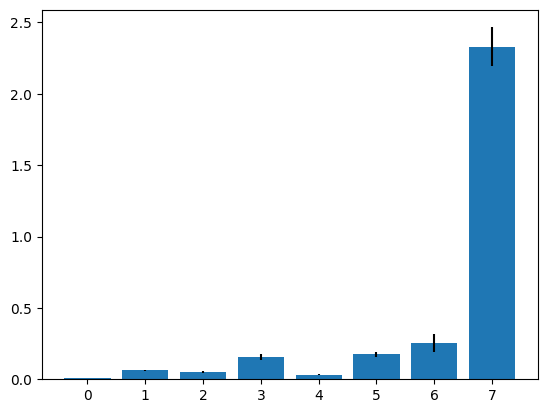

In [191]:
max_ind = pd.DataFrame([final_data_1[(final_data_1.index.str.startswith('E38-E20')) & (final_data_1.index.str.endswith('0'))].tolist(),
              final_data_1[(final_data_1.index.str.startswith('E38-E20')) & (final_data_1.index.str.endswith('1'))].tolist(),
              final_data_1[(final_data_1.index.str.startswith('E38-E20')) & (final_data_1.index.str.endswith('2'))].tolist()]).T
#max_ind
plt.bar(max_ind.index, max_ind.mean(axis=1), yerr=max_ind.std(axis=1))
plt.show()